# Building a Simple NLP Spam Dectector

## 1.0 Loading our Data

In [1]:
import numpy as np
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/spam.csv"
data = pd.read_csv(file_name, encoding = "latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Let's rename our columns to something a bit more interpretable and extract only the columns we need

In [2]:
data = data[['v1', 'v2']]
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [4]:
data.label.unique()

array(['ham', 'spam'], dtype=object)

In [5]:
# percentage of missing values in each column
round(100 * (data.isnull().sum()/len(data)),2).sort_values(ascending=False)

label    0.0
text     0.0
dtype: float64

In [6]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data[data[['label', 'text']].duplicated() == True]

,label,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [8]:
data = data.drop_duplicates()

In [9]:
# Sanity Check to make sure it worked
data[data[['label', 'text']].duplicated() == True]

,label,text


In [10]:
data.shape

(5169, 2)

#### Simple plot of out class label counts

<AxesSubplot:>

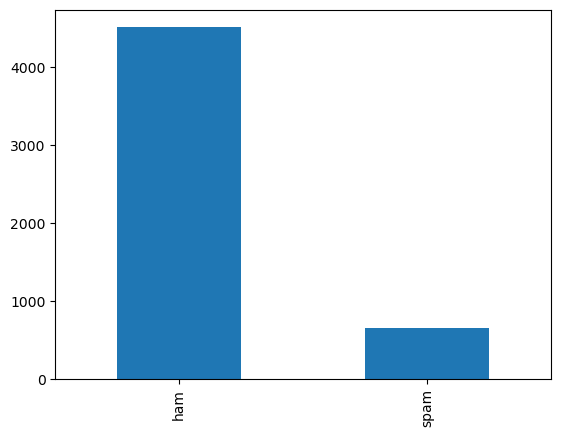

In [11]:
data.label.value_counts().plot(kind="bar")

# 2. Building our Spam/Ham Classifer

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def review_messages(msg):
    # converting messages to lowercase
    msg = msg.lower()
    return msg

In [13]:
# Processing text messages
data['text'] = data['text'].apply(review_messages)

In [14]:
# Inspect the changes on our data
data

,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


### Preparing our data

In [15]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.1, random_state = 1)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# training vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

![](https://miro.medium.com/max/3604/0*56JnM18OAx1lhIQb.png)

### Training our model

In [17]:
from sklearn import svm
# training the classifier 
svm = svm.SVC(C=1000)
svm.fit(X_train_vec, y_train)

SVC(C=1000)

In [18]:
# testing against testing set 
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test) 

print("We have an accuracy of: " + str(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))
#y_test and y_pred store which are spam or ham
#vectorized data matrix store in which email, which word's tfidf

We have an accuracy of: 0.9845261121856866
[[462   0]
 [  8  47]]


### Predict where your text is Spam or Ham

In [19]:
# test against new messages 
def pred(msg):
    msg = vectorizer.transform([msg])
    prediction = svm.predict(msg)
    return prediction[0]

In [20]:
for i in range(0, 10):
  rand_index = np.random.randint(0, len(data))
  test_sample = data.iloc[rand_index][1]

  print(test_sample)
  print("Text is - " + str(pred(test_sample)) +"\n")

nite nite pocay wocay luv u more than n e thing 4eva i promise ring u 2morrowxxxx
Text is - ham

guess who spent all last night phasing in and out of the fourth dimension
Text is - ham

smith waste da.i wanna gayle.
Text is - ham

reply with your name and address and you will receive by post a weeks completely free accommodation at various global locations www.phb1.com ph:08700435505150p
Text is - spam

just wanted to say holy shit you guys weren't kidding about this bud
Text is - ham

just send a text. we'll skype later.
Text is - ham

ok i thk i got it. then u wan me 2 come now or wat?
Text is - ham

urgent! call 09061749602 from landline. your complimentary 4* tenerife holiday or å£10,000 cash await collection sae t&cs box 528 hp20 1yf 150ppm 18+
Text is - spam

wiskey brandy rum gin beer vodka scotch shampain wine \kudi\"yarasu dhina vaazhthukkal. .."
Text is - ham

i see the letter b on my car
Text is - ham



C:\Users\22600\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\22600\anaconda\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\22600\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


      feature  coefficient
2832     free    -5.897344
6745      txt    -6.220625
4344   mobile    -6.327226
6462     text    -6.359413
6175     stop    -6.359893
5437    reply    -6.400975
1729    claim    -6.402286
5158    prize    -6.422231
7240      www    -6.534134
6845       ur    -6.583185
7182      won    -6.712203
300      150p    -6.739454
1580     cash    -6.745318
6849   urgent    -6.757705
1884  contact    -6.762475
5735  service    -6.771316
4538      new    -6.786593
6770       uk    -6.813866
4577    nokia    -6.820873
7133      win    -6.954927


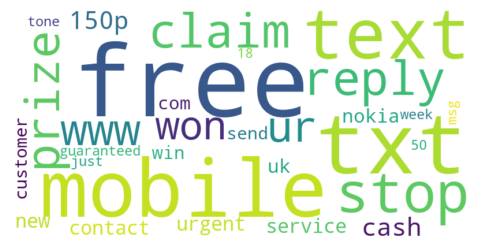

time cost 0.6524438858032227


In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt


import time

time_start = time.time()


# Load the data
df = data

# Split the data into training and testing sets
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

# Preprocess the data
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = vectorizer.fit_transform(train['text'])
X_test = vectorizer.transform(test['text'])
y_train = train['label']
y_test = test['label']

# Train the model
clf = MultinomialNB() #Naive Bayes
clf.fit(X_train, y_train)

# Get the top coefficients
top_coeffs = pd.DataFrame({'feature': vectorizer.get_feature_names(), 'coefficient': clf.coef_[0]})
top_coeffs = top_coeffs.sort_values(by='coefficient', ascending=False)[:20]
print(top_coeffs)

top_spam_features = [feature_names[i] for i in feature_importance.argsort()[::-1][:20]]



# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white', max_words=30, stopwords=vectorizer.get_stop_words()).generate_from_frequencies(
    {word: freq/clf.feature_count_[1].max() for word, freq in zip(vectorizer.get_feature_names(), clf.feature_count_[1])}
)
plt.figure(figsize=(6,3 ))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

time_end = time.time()
print('time cost',time_end-time_start)

In [37]:
# Get the feature importance
feature_importance = clf.coef_[0]

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names()

# Sort the feature importance in descending order and get the top 20 features
top_spam_features = [feature_names[i] for i in feature_importance.argsort()[::-1][:20]]
top_ham_features = [feature_names[i] for i in feature_importance.argsort()[:20]]

top_coeffs = pd.DataFrame({'spam': top_spam_features, 'ham': top_ham_features})


# Print the top spam and ham features
print('Top spam features:', top_spam_features)
print('Top ham features:', top_ham_features)

top_coeffs = pd.DataFrame({'spam': top_spam_features, 'ham': top_ham_features})
print(top_coeffs)

Top spam features: ['free', 'txt', 'mobile', 'text', 'stop', 'reply', 'claim', 'prize', 'www', 'ur', 'won', '150p', 'cash', 'urgent', 'contact', 'service', 'new', 'uk', 'nokia', 'win']
Top ham features: ['jump', 'nange', 'nan', 'namous', 'names', 'named', 'nalli', 'nalla', 'nahi', 'nah', 'nanny', 'nagar', 'naal', 'na', 'n8', 'mystery', 'mys', 'myparents', 'mylife', 'mwahs']
       spam        ham
0      free       jump
1       txt      nange
2    mobile        nan
3      text     namous
4      stop      names
5     reply      named
6     claim      nalli
7     prize      nalla
8       www       nahi
9        ur        nah
10      won      nanny
11     150p      nagar
12     cash       naal
13   urgent         na
14  contact         n8
15  service    mystery
16      new        mys
17       uk  myparents
18    nokia     mylife
19      win      mwahs


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import precision_score

clf = MultinomialNB()

X = vectorizer.fit_transform(data['text'])
y = data['label']

# Perform 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')

# Print cross-validation scores
print('Cross-validation scores:', scores)

# Print mean and standard deviation of cross-validation scores
print('Mean F1 score:', np.mean(scores))
print('Standard deviation of F1 score:', np.std(scores))

scoring_recall = make_scorer(recall_score, pos_label='spam')
scores_recall = cross_val_score(clf, X, y, cv=10, scoring=scoring_recall)
print('scores_recall:', scores_recall)
print('Mean recall score:', np.mean(scores_recall))
print('Standard deviation of recall score:', np.std(scores_recall))

scoring_precision = make_scorer(precision_score, pos_label='spam')
scores_precision = cross_val_score(clf, X, y, cv=10, scoring=scoring_precision)
print('scores_precision:', scores_precision)
print('Mean precision score:', np.mean(scores_precision))
print('Standard deviation of precision score:', np.std(scores_precision))

Cross-validation scores: [0.94777058 0.94777058 0.8982684  0.90988147 0.92112891 0.8982684
 0.91683777 0.91683777 0.91683777 0.93201325]
Mean F1 score: 0.9205614910804517
Standard deviation of F1 score: 0.01661854172757136
scores_recall: [0.83076923 0.83076923 0.69230769 0.72307692 0.75384615 0.69230769
 0.74242424 0.74242424 0.74242424 0.78461538]
Mean recall score: 0.7534965034965034
Standard deviation of recall score: 0.04657459905984041
scores_precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean precision score: 1.0
Standard deviation of precision score: 0.0
